In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from random import uniform, random
from scipy.interpolate import interp1d

In [2]:
c = 2.99792458E10  # cm per sec, light speed
h = 6.626070040812E-27  # erg*sec, Planck constant
k = 1.380648528E-16  # erg/K, Boltzmann constant
G = 6.67e-8 # cgs
solar_mass = 1.989e33 # g
solar_radius = 6.955e10 # cm
sun_radius = 695700 * 10 ** 5 #cm
parsec = 3.086e+18 #cm

In [3]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw4/')
fig_dir =  Path('./../reports/figures/')

# 1

In [4]:
files = {'10' : data_dir/'M10/',
         '15' : data_dir/'M15/',
         '20' : data_dir/'M20/',
         '30' : data_dir/'M30/',
         '40' : data_dir/'M40/',
         '60' : data_dir/'M60/',
         '80' : data_dir/'M80/'
        }

In [75]:
star10  = pd.read_csv(files['10'] / '10M.data', sep='\s+', header=4)
star15  = pd.read_csv(files['15'] / '15M.data', sep='\s+', header=4)
star20  = pd.read_csv(files['20'] / '20M.data', sep='\s+', header=4)
star30  = pd.read_csv(files['30'] / '30M.data', sep='\s+', header=4)
star40  = pd.read_csv(files['40'] / '40M.data', sep='\s+', header=4)
star60  = pd.read_csv(files['60'] / '60M.data', sep='\s+', header=4)
star80  = pd.read_csv(files['80'] / '80M.data', sep='\s+', header=4)

In [76]:
def process(dataset):
    dataset = dataset[dataset.loc[:, 'star_age'] > 1e4].copy()
    dataset.loc[:, 'ratio_LH'] = 10 ** dataset.loc[:, 'log_LH'] / 10 ** dataset.loc[:, 'log_L']
    dataset.loc[:, 'ratio_LHe'] = 10 ** dataset.loc[:, 'log_LHe'] / 10 ** dataset.loc[:, 'log_L']
    return dataset

In [95]:
star10 = process(star10)
star15 = process(star15)
star20 = process(star20)
star30 = process(star30)
star40 = process(star40)
star60 = process(star60)
star80 = process(star80)

In [96]:
min_L = min(np.log10(star10['ratio_LH']).min(),
            np.log10(star15['ratio_LH']).min(),
            np.log10(star20['ratio_LH']).min(),
            np.log10(star30['ratio_LH']).min(),
            np.log10(star40['ratio_LH']).min(),
            np.log10(star60['ratio_LH']).min(),
            np.log10(star80['ratio_LH']).min())

max_L = max(np.log10(star10['ratio_LH']).max(),
            np.log10(star15['ratio_LH']).max(),
            np.log10(star20['ratio_LH']).max(),
            np.log10(star30['ratio_LH']).max(),
            np.log10(star40['ratio_LH']).max(),
            np.log10(star60['ratio_LH']).max(),
            np.log10(star80['ratio_LH']).max())
rainbow = cm.get_cmap('rainbow')
norm=plt.Normalize(10 ** min_L, 1)

<ipython-input-97-606b87f51ad2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)


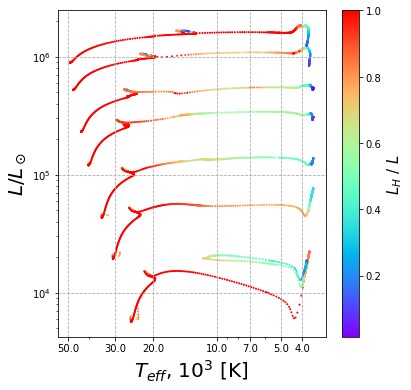

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))

x = ax.scatter(np.power(10, star10['log_Teff']), np.power(10, star10['log_L']), 
        s=1, c=(star10['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 10 M_{\odot}$')
ax.scatter(np.power(10, star15['log_Teff']), np.power(10, star15['log_L']), 
        s=1, c=(star15['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 15 M_{\odot}$')
ax.scatter(np.power(10, star20['log_Teff']), np.power(10, star20['log_L']), 
        s=1, c=(star20['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 20 M_{\odot}$')
ax.scatter(np.power(10, star30['log_Teff']), np.power(10, star30['log_L']), 
        s=1, c=(star30['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 30 M_{\odot}$')
ax.scatter(np.power(10, star40['log_Teff']), np.power(10, star40['log_L']), 
        s=1, c=(star40['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 40 M_{\odot}$')
ax.scatter(np.power(10, star60['log_Teff']), np.power(10, star60['log_L']), 
        s=1, c=(star60['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 60 M_{\odot}$')
ax.scatter(np.power(10, star80['log_Teff']), np.power(10, star80['log_L']), 
        s=1, c=(star80['ratio_LH'])  , cmap='rainbow', norm=norm, label=r'$M = 80 M_{\odot}$')

ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
# ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)
ax.set_xticks(     [4000, 5000, 7000, 10000, 20000, 30000, 50000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(x)
cb.set_label(r'$L_{H}$ / $L$', fontsize=15)
plt.savefig(fig_dir / '4HR_LH_ratio.png', dpi=300, bbox_inches='tight')

In [98]:
min_L = min(np.log10(star10['ratio_LHe']).min(),
            np.log10(star15['ratio_LHe']).min(),
            np.log10(star20['ratio_LHe']).min(),
            np.log10(star30['ratio_LHe']).min(),
            np.log10(star40['ratio_LHe']).min(),
            np.log10(star60['ratio_LHe']).min(),
            np.log10(star80['ratio_LHe']).min())

max_L = max(np.log10(star10['ratio_LHe']).max(),
            np.log10(star15['ratio_LHe']).max(),
            np.log10(star20['ratio_LHe']).max(),
            np.log10(star30['ratio_LHe']).max(),
            np.log10(star40['ratio_LHe']).max(),
            np.log10(star60['ratio_LHe']).max(),
            np.log10(star80['ratio_LHe']).max())
rainbow = cm.get_cmap('rainbow')
norm=plt.Normalize(10 ** min_L, 10 ** max_L)

<ipython-input-99-8cad686ac9c5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)


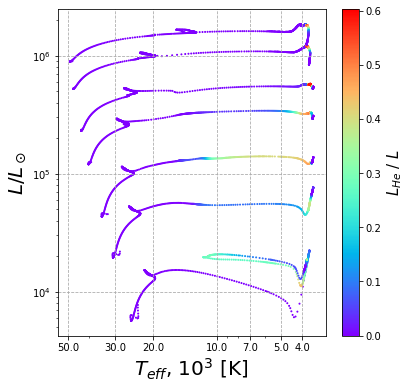

In [99]:
fig, ax = plt.subplots(figsize=(6, 6))

x = ax.scatter(np.power(10, star10['log_Teff']), np.power(10, star10['log_L']), 
        s=1, c=(star10['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 10 M_{\odot}$')
ax.scatter(np.power(10, star15['log_Teff']), np.power(10, star15['log_L']), 
        s=1, c=(star15['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 15 M_{\odot}$')
ax.scatter(np.power(10, star20['log_Teff']), np.power(10, star20['log_L']), 
        s=1, c=(star20['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 20 M_{\odot}$')
ax.scatter(np.power(10, star30['log_Teff']), np.power(10, star30['log_L']), 
        s=1, c=(star30['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 30 M_{\odot}$')
ax.scatter(np.power(10, star40['log_Teff']), np.power(10, star40['log_L']), 
        s=1, c=(star40['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 40 M_{\odot}$')
ax.scatter(np.power(10, star60['log_Teff']), np.power(10, star60['log_L']), 
        s=1, c=(star60['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 60 M_{\odot}$')
ax.scatter(np.power(10, star80['log_Teff']), np.power(10, star80['log_L']), 
        s=1, c=(star80['ratio_LHe'])  , cmap='rainbow', norm=norm, label=r'$M = 80 M_{\odot}$')

ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
# ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)
ax.set_xticks(     [4000, 5000, 7000, 10000, 20000, 30000, 50000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(x)
cb.set_label(r'$L_{He}$ / $L$', fontsize=15)
plt.savefig(fig_dir / '4HR_LHe_ratio.png', dpi=300, bbox_inches='tight')

# 2

In [12]:
qs    = np.linspace(0.1, 1, 11)
logPs = np.linspace(0.15, 3.5, 101)

In [13]:
def q_distribution(qs):
    return np.ones_like(qs)

def logP_distribution(logPs):
    distr = logPs ** (-0.5)
    return distr / distr.max()

In [14]:
def neyman(x, f): 
    """randomly picks q from defined distribution f(x)"""
    iter = True
    while iter == True:
        q, Fr = uniform(x.min(), x.max()), random() * f.max()
        F = interp1d(x, f)
        if Fr <= F(q) and q != 0:
            iter = False
            return q
        else:
            iter = True

In [15]:
# a, b = [], []
# for i in range(10000):
#     logP, y = neyman(logPs, logP_distribution(logPs))
#     a.append(logP)
#     b.append(y)

In [16]:
# fig, ax = plt.subplots(figsize=(7, 5))
# ax.scatter(a, b, s=1, label='monte carlo sampling')
# ax.plot(logPs, logP_distribution(logPs), lw=2, c='black', label='source function')
# ax.set_xlim(0.15, 3.5)
# ax.set_ylim(0, 1)
# ax.set_xlabel('log P', fontsize=12)
# ax.set_ylabel('f(log P)', fontsize=12)
# plt.legend()
# plt.savefig(fig_dir / '4MonteCarlo.png', dpi=300)

In [17]:
def probability_of_interaction(M1, R1):
    """
    calculates the probability of Roche lobe overflow for binary 
    with primary star with mass M1 and radius R1
    
    """
    result = []
    for star in range (0, 10000):
        q = neyman(qs, q_distribution(qs))
        logP = neyman(logPs, logP_distribution(logPs))
        M2 = q * M1
        major_axis = np.power(G * (M1 + M2) * solar_mass * 
                              (np.power(10, logP) * 24 * 3600) ** 2 / (2 * np.pi) ** 2, 
                              1 / 3)
        x = 1 / q
        R_Roche = major_axis * 0.49 * x ** 2/3 / (0.6 * x ** 2/3 + np.log(1 + x ** 1/3)) / solar_radius
        if R_Roche > R1:
            result.append(0)
        else:
            result.append(1)
    probability = np.mean(result)
    return probability

In [31]:
# probs10 = []
# for star in tqdm(star10.index):
#     mass = star10.loc[star, 'star_mass']
#     radius = np.power(10, star10.loc[star, 'log_R'])
#     probs10.append(probability_of_interaction(mass, radius)) 

# probs15 = []
# for star in tqdm(star15.index):
#     mass = star15.loc[star, 'star_mass']
#     radius = np.power(10, star15.loc[star, 'log_R'])
#     probs15.append(probability_of_interaction(mass, radius))

# probs20 = []
# for star in tqdm(star20.index):
#     mass = star20.loc[star, 'star_mass']
#     radius = np.power(10, star20.loc[star, 'log_R'])
#     probs20.append(probability_of_interaction(mass, radius))

# probs30 = []
# for star in tqdm(star30.index):
#     mass = star30.loc[star, 'star_mass']
#     radius = np.power(10, star30.loc[star, 'log_R'])
#     probs30.append(probability_of_interaction(mass, radius)) 

# probs40 = []
# for star in tqdm(star40.index):
#     mass = star40.loc[star, 'star_mass']
#     radius = np.power(10, star40.loc[star, 'log_R'])
#     probs40.append(probability_of_interaction(mass, radius))

# probs60 = []
# for star in tqdm(star60.index):
#     mass = star60.loc[star, 'star_mass']
#     radius = np.power(10, star60.loc[star, 'log_R'])
#     probs60.append(probability_of_interaction(mass, radius)) 

# probs80 = []
# for star in tqdm(star80.index):
#     mass = star80.loc[star, 'star_mass']
#     radius = np.power(10, star80.loc[star, 'log_R'])
#     probs80.append(probability_of_interaction(mass, radius)) 

100%|██████████| 1187/1187 [4:03:36<00:00, 12.31s/it]   


In [73]:
rainbow = cm.get_cmap('rainbow')
norm=plt.Normalize(-4.5, 1)

<ipython-input-74-165f4d898ea9>:4: RuntimeWarning: divide by zero encountered in log10
  s=1, c=np.log10(probs10), cmap='rainbow', norm=norm, label=r'$M = 10 M_{\odot}$')
<ipython-input-74-165f4d898ea9>:6: RuntimeWarning: divide by zero encountered in log10
  s=1, c=np.log10(probs15), cmap='rainbow', norm=norm, label=r'$M = 15 M_{\odot}$')
<ipython-input-74-165f4d898ea9>:8: RuntimeWarning: divide by zero encountered in log10
  s=1, c=np.log10(probs20), cmap='rainbow', norm=norm, label=r'$M = 20 M_{\odot}$')
<ipython-input-74-165f4d898ea9>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)


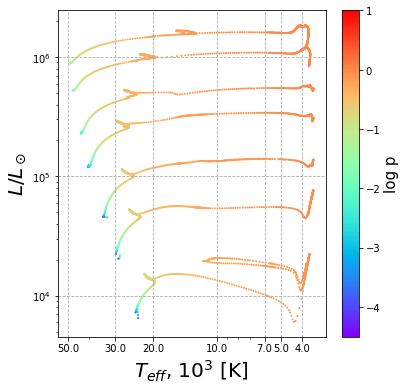

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))

x = ax.scatter(np.power(10, star10['log_Teff']), np.power(10, star10['log_L']), 
        s=1, c=np.log10(probs10), cmap='rainbow', norm=norm, label=r'$M = 10 M_{\odot}$')
ax.scatter(np.power(10, star15['log_Teff']), np.power(10, star15['log_L']), 
        s=1, c=np.log10(probs15), cmap='rainbow', norm=norm, label=r'$M = 15 M_{\odot}$')
ax.scatter(np.power(10, star20['log_Teff']), np.power(10, star20['log_L']), 
        s=1, c=np.log10(probs20), cmap='rainbow', norm=norm, label=r'$M = 20 M_{\odot}$')
ax.scatter(np.power(10, star30['log_Teff']), np.power(10, star30['log_L']), 
        s=1, c=np.log10(probs30), cmap='rainbow', norm=norm, label=r'$M = 30 M_{\odot}$')
ax.scatter(np.power(10, star40['log_Teff']), np.power(10, star40['log_L']), 
        s=1, c=np.log10(probs40), cmap='rainbow', norm=norm, label=r'$M = 40 M_{\odot}$')
ax.scatter(np.power(10, star60['log_Teff']), np.power(10, star60['log_L']), 
        s=1, c=np.log10(probs60), cmap='rainbow', norm=norm, label=r'$M = 60 M_{\odot}$')
ax.scatter(np.power(10, star80['log_Teff']), np.power(10, star80['log_L']), 
        s=1, c=np.log10(probs80), cmap='rainbow', norm=norm, label=r'$M = 80 M_{\odot}$')

ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
# ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 7000, 10000, 20000, 30000, 50000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 10000, 20000, 30000, 50000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(x)
cb.set_label(r'log p', fontsize=15)
# plt.savefig(fig_dir / '4HR_probability.png', dpi=300, bbox_inches='tight')

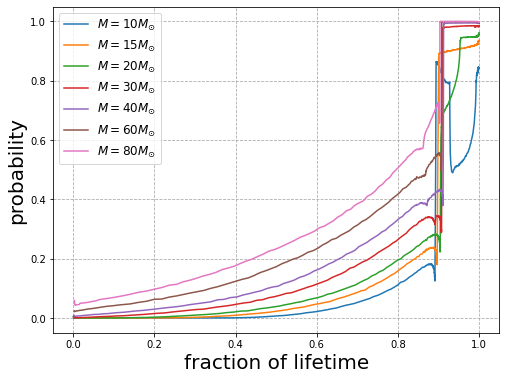

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(star10['star_age'] / np.max(star10['star_age']), np.array(probs10), label=r'$M = 10 M_{\odot}$')
plt.plot(star15['star_age'] / np.max(star15['star_age']), np.array(probs15), label=r'$M = 15 M_{\odot}$')
plt.plot(star20['star_age'] / np.max(star20['star_age']), np.array(probs20), label=r'$M = 20 M_{\odot}$')
plt.plot(star30['star_age'] / np.max(star30['star_age']), probs30, label=r'$M = 30 M_{\odot}$')
plt.plot(star40['star_age'] / np.max(star40['star_age']), probs40, label=r'$M = 40 M_{\odot}$')
plt.plot(star60['star_age'] / np.max(star60['star_age']), probs60, label=r'$M = 60 M_{\odot}$')
plt.plot(star80['star_age'] / np.max(star80['star_age']), probs80, label=r'$M = 80 M_{\odot}$')

ax.grid(c='#aaaaaa', ls='--')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
# ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
# ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000, 20000, 30000, 50000]) / 1000)
# ax.set_xticks(     [4000, 5000, 6000, 7000, 10000, 20000, 30000, 50000])
plt.legend(fontsize=12)
# ax.invert_xaxis()
plt.ylabel(r"probability", size=20)
plt.xlabel(r"fraction of lifetime", size=20)
# cb = plt.colorbar(x)
# cb.set_label(r'probability of interaction', fontsize=15)
#plt.savefig(fig_dir / '4probability_in_lifetime.png', dpi=300, bbox_inches='tight')
